This notebook will walk through the process of web scraping of Amazon product reviews to show an example of how you can collect training data for training a sentiment analyzer.

When performing web scraping, especially if the objective is to collect large collection of data, there needs to be a systematic way to do the webscraping. In general, for most sites, there are 2 main kinds of websites:
- Listing Pages
- Details Pages

The strategy for building the Amazon product reviews webscraper would be to:
1. extract a list of product urls from **each page** of product listing pages
2. access each product product and obtain the product reviews listing pages
3. extract the list of reviews from **each page** of product reviews listing pages for a product

Consider amazon.com, suppose we want to grab large collection of the product reviews from the site as training set for training out sentiment classifier, the first thing is to find a way to get to the listing pages. For the Amazon case, the way to get to listing pages, is to look for a product that contains a list of product categories.

![](https://www.comp.nus.edu.sg/~lekhsian/nlp/amazon.png)

## Product Listing Pages

By clicking on one of the category, we are able to obtain a listing page. A listing page can be defined as a page containing a listing of entries.

![](https://www.comp.nus.edu.sg/~lekhsian/nlp/amazon1.png)

The next thing is to extract the list of product urls.

## Products Details Pages

![](https://www.comp.nus.edu.sg/~lekhsian/nlp/amazon2.png)
From a product url (aka **details page**), we can then scroll down to the section we are interested in extracting. 
![](https://www.comp.nus.edu.sg/~lekhsian/nlp/amazon3.png)
In this case, we are more interested in extracting all the reviews for the products rather than product information, so we want to find the product reviews listing page.
![](https://www.comp.nus.edu.sg/~lekhsian/nlp/amazon4.png)

If we take a closer look at the URL of product reviews pages, they usually follow a specific url pattern. For example if the product url is:

https://www.amazon.com/Apple-MK0C2AM-A-Apple-Pencil/dp/B016NY7784/ 

then the corresponding first page of the product reviews page for this product would be at:

https://www.amazon.com/Apple-MK0C2AM-A-Apple-Pencil/product-reviews/B016NY7784/

In [1]:
#load libraries
from bs4 import BeautifulSoup
import requests
import re
import os.path
import pandas as pd

#### Caching Mechanism

In [2]:
computer_url = "https://www.amazon.com/s?rh=n%3A16225007011&fs=true"

In [3]:
#function that will take in a URL and return a filename of the url without special characters
def generate_filename_from_url(url):
    #replace all the special characters (e.g. : . / ? , & = %) with _
    filename = re.sub("[:./\\?,&=%]", "_", url)
    filename = filename + ".html"
    return filename

In [4]:
generate_filename_from_url(computer_url)

'https___www_amazon_com_s_rh_n_3A16225007011_fs_true.html'

In [5]:
#function that will retrieve the cache version of the url
#download if not found in cache
def download_page(url, use_cache = True):
    filename = generate_filename_from_url(url)
    
    #attempt to get from the cache
    #check whether the url has been cached before 
    if use_cache and os.path.isfile(filename):
        html = open(filename, 'r', encoding="utf-8").read()
        return html
    
    print("#downloading...", url)
    #def extract_product_urls(url):
    page = requests.get(url, allow_redirects=True, headers={'User-Agent':
                'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/44.0.2403.157 Safari/537.36',
                'Accept-Language': 'en-US, en;q=0.5'}, cookies={'__hs_opt_out': 'no'})
    
    #cache the file
    open(filename, "wb").write(page.content)
    
    return page.content

In [6]:
#if not found in the cache -> download it
#if found in cache -> return the html of the cached file
download_page(computer_url)

'<!doctype html><html lang="en-us" class="a-no-js" data-19ax5a9jf="dingo"><!-- sp:feature:head-start -->\n<head><script>var aPageStart = (new Date()).getTime();</script><meta charset="utf-8"/>\n<!-- sp:end-feature:head-start -->\n<!-- sp:feature:csm:head-open-part1 -->\n\n<script type=\'text/javascript\'>var ue_t0=ue_t0||+new Date();</script>\n<!-- sp:end-feature:csm:head-open-part1 -->\n<!-- sp:feature:cs-optimization -->\n<meta http-equiv=\'x-dns-prefetch-control\' content=\'on\'>\n<link rel="dns-prefetch" href="https://images-na.ssl-images-amazon.com">\n<link rel="dns-prefetch" href="https://m.media-amazon.com">\n<link rel="dns-prefetch" href="https://completion.amazon.com">\n<!-- sp:end-feature:cs-optimization -->\n<!-- sp:feature:csm:head-open-part2 -->\n<script type=\'text/javascript\'>\nwindow.ue_ihb = (window.ue_ihb || window.ueinit || 0) + 1;\nif (window.ue_ihb === 1) {\n\nvar ue_csm = window,\n    ue_hob = +new Date();\n(function(d){var e=d.ue=d.ue||{},f=Date.now||function(){

'<!doctype html><html lang="en-us" class="a-no-js" data-19ax5a9jf="dingo"><!-- sp:feature:head-start -->\n<head><script>var aPageStart = (new Date()).getTime();</script><meta charset="utf-8"/>\n<!-- sp:end-feature:head-start -->\n<!-- sp:feature:csm:head-open-part1 -->\n\n<script type=\'text/javascript\'>var ue_t0=ue_t0||+new Date();</script>\n<!-- sp:end-feature:csm:head-open-part1 -->\n<!-- sp:feature:cs-optimization -->\n<meta http-equiv=\'x-dns-prefetch-control\' content=\'on\'>\n<link rel="dns-prefetch" href="https://images-na.ssl-images-amazon.com">\n<link rel="dns-prefetch" href="https://m.media-amazon.com">\n<link rel="dns-prefetch" href="https://completion.amazon.com">\n<!-- sp:end-feature:cs-optimization -->\n<!-- sp:feature:csm:head-open-part2 -->\n<script type=\'text/javascript\'>\nwindow.ue_ihb = (window.ue_ihb || window.ueinit || 0) + 1;\nif (window.ue_ihb === 1) {\n\nvar ue_csm = window,\n    ue_hob = +new Date();\n(function(d){var e=d.ue=d.ue||{},f=Date.now||function(){
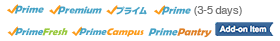

In [8]:
download_page("https://www.amazon.com/SAMSUNG-Internal-Gaming-MZ-V8P2T0B-AM/dp/B08RK2SR23")

## 1. Extract Product URLs from a Product Listing Page

![](https://www.comp.nus.edu.sg/~lekhsian/nlp/amazon1.png)

#### Given a product category URL, extract a list of product list in it

In [9]:
#parse the page
soup = BeautifulSoup(download_page(computer_url), 'html.parser')
elements = soup.select("h2 a")
elements

[<a class="a-link-normal s-underline-text s-underline-link-text s-link-style a-text-normal" href="/SAMSUNG-microSDXC-Expanded-MB-ME256KA-AM/dp/B09B1GXM16/ref=sr_1_1?qid=1683991865&amp;s=computers-intl-ship&amp;sr=1-1"><span class="a-size-base-plus a-color-base a-text-normal">SAMSUNG EVO Select Micro SD-Memory-Card + Adapter, 256GB microSDXC 130MB/s Full HD &amp; 4K UHD, UHS-I, U3, A2, V30, Expanded Storage for Android Smartphones, Tablets, Nintendo-Switch (MB-ME256KA/AM)</span> </a>,
 <a class="a-link-normal s-underline-text s-underline-link-text s-link-style a-text-normal" href="/Logitech-MK270-Wireless-Keyboard-Mouse/dp/B079JLY5M5/ref=sr_1_2?qid=1683991865&amp;s=computers-intl-ship&amp;sr=1-2"><span class="a-size-base-plus a-color-base a-text-normal">Logitech MK270 Wireless Keyboard And Mouse Combo For Windows, 2.4 GHz Wireless, Compact Mouse, 8 Multimedia And Shortcut Keys, For PC, Laptop - Black</span> </a>,
 <a class="a-link-normal s-underline-text s-underline-link-text s-link-sty

In [10]:
elements[0]

<a class="a-link-normal s-underline-text s-underline-link-text s-link-style a-text-normal" href="/SAMSUNG-microSDXC-Expanded-MB-ME256KA-AM/dp/B09B1GXM16/ref=sr_1_1?qid=1683991865&amp;s=computers-intl-ship&amp;sr=1-1"><span class="a-size-base-plus a-color-base a-text-normal">SAMSUNG EVO Select Micro SD-Memory-Card + Adapter, 256GB microSDXC 130MB/s Full HD &amp; 4K UHD, UHS-I, U3, A2, V30, Expanded Storage for Android Smartphones, Tablets, Nintendo-Switch (MB-ME256KA/AM)</span> </a>

In [11]:
elements[0].get("href")

'/SAMSUNG-microSDXC-Expanded-MB-ME256KA-AM/dp/B09B1GXM16/ref=sr_1_1?qid=1683991865&s=computers-intl-ship&sr=1-1'

In [12]:
#we want to strip away the back part of the url after ?XXX
def clean_url(url):
    url = url.split("?")[0]
    return url

In [13]:
product_links = [clean_url(e.get("href")) for e in elements]
product_links

['/SAMSUNG-microSDXC-Expanded-MB-ME256KA-AM/dp/B09B1GXM16/ref=sr_1_1',
 '/Logitech-MK270-Wireless-Keyboard-Mouse/dp/B079JLY5M5/ref=sr_1_2',
 '/Seagate-Portable-External-Hard-Drive/dp/B07CRG94G3/ref=sr_1_3',
 '/SAMSUNG-Internal-Gaming-MZ-V8P2T0B-AM/dp/B08RK2SR23/ref=sr_1_4',
 '/Sceptre-E248W-19203R-Monitor-Speakers-Metallic/dp/B0773ZY26F/ref=sr_1_5',
 '/HP-Cartridge-F6U64AN-Deskjet-Officejet/dp/B00WJDWGA8/ref=sr_1_6',
 '/Logitech-Wireless-Computer-Unifying-Receiver/dp/B087Z5WDJ2/ref=sr_1_7',
 '/SanDisk-128GB-Extreme-UHS-I-Memory/dp/B09X7FXHVJ/ref=sr_1_8',
 '/Logitech-C920x-Pro-HD-Webcam/dp/B085TFF7M1/ref=sr_1_9',
 '/Logitech-Headset-H390-Noise-Cancelling/dp/B000UXZQ42/ref=sr_1_10',
 '/Webcam-Streaming-Recording-Built-Correction/dp/B07M6Y7355/ref=sr_1_11',
 '/HP-Cartridge-F6U62AN-Deskjet-Officejet/dp/B00WR23X5I/ref=sr_1_12',
 '/Logitech-MK345-Wireless-Combo-Right-Handed/dp/B00QXT5T3U/ref=sr_1_13',
 '/Samsung-970-EVO-Plus-MZ-V7S1T0B/dp/B07MFZY2F2/ref=sr_1_14',
 '/HP-Original-Cartridge-F6U

In [14]:
#combine everything into a function
def extract_product_urls(url):
    soup = BeautifulSoup(download_page(url), 'html.parser')
    elements = soup.select("h2 a")
    product_links = [clean_url(e.get("href")) for e in elements]
    return product_links

In [15]:
product_urls = extract_product_urls(computer_url)
product_urls

['/SAMSUNG-microSDXC-Expanded-MB-ME256KA-AM/dp/B09B1GXM16/ref=sr_1_1',
 '/Logitech-MK270-Wireless-Keyboard-Mouse/dp/B079JLY5M5/ref=sr_1_2',
 '/Seagate-Portable-External-Hard-Drive/dp/B07CRG94G3/ref=sr_1_3',
 '/SAMSUNG-Internal-Gaming-MZ-V8P2T0B-AM/dp/B08RK2SR23/ref=sr_1_4',
 '/Sceptre-E248W-19203R-Monitor-Speakers-Metallic/dp/B0773ZY26F/ref=sr_1_5',
 '/HP-Cartridge-F6U64AN-Deskjet-Officejet/dp/B00WJDWGA8/ref=sr_1_6',
 '/Logitech-Wireless-Computer-Unifying-Receiver/dp/B087Z5WDJ2/ref=sr_1_7',
 '/SanDisk-128GB-Extreme-UHS-I-Memory/dp/B09X7FXHVJ/ref=sr_1_8',
 '/Logitech-C920x-Pro-HD-Webcam/dp/B085TFF7M1/ref=sr_1_9',
 '/Logitech-Headset-H390-Noise-Cancelling/dp/B000UXZQ42/ref=sr_1_10',
 '/Webcam-Streaming-Recording-Built-Correction/dp/B07M6Y7355/ref=sr_1_11',
 '/HP-Cartridge-F6U62AN-Deskjet-Officejet/dp/B00WR23X5I/ref=sr_1_12',
 '/Logitech-MK345-Wireless-Combo-Right-Handed/dp/B00QXT5T3U/ref=sr_1_13',
 '/Samsung-970-EVO-Plus-MZ-V7S1T0B/dp/B07MFZY2F2/ref=sr_1_14',
 '/HP-Original-Cartridge-F6U

In [17]:
computer_url

'https://www.amazon.com/s?rh=n%3A16225007011&fs=true'

In [16]:
#if we want other pages in the category, we can append &page=X behind
extract_product_urls(computer_url + "&page=2")

['/SanDisk-Extreme-microSDXC-Memory-Adapter/dp/B09X7CRKRZ/ref=sr_1_25',
 '/HP-24mh-FHD-Monitor-Built/dp/B08BF4CZSV/ref=sr_1_26',
 '/SanDisk-2TB-Extreme-Portable-SDSSDE61-2T00-G25/dp/B08HN37XC1/ref=sr_1_27',
 '/iPhone-Charger-Certified%E3%80%91-Lightning-AirPods/dp/B08P25VBY1/ref=sr_1_28',
 '/SAMSUNG-Android-Compact-Lasting-Battery/dp/B094Q89NKH/ref=sr_1_29',
 '/Extender-Coverage-Extenders-internet-Amplifier/dp/B0BDSM76W4/ref=sr_1_30',
 '/iPhone-Charger-Certified-Lightning-Charging/dp/B0B283QP2N/ref=sr_1_31',
 '/Portable-GUSGU-Stroller-Flexible-Rechargeable/dp/B093BG1FRZ/ref=sr_1_32',
 '/Lenovo-Ideapad-Touchscreen-i3-1005G1-Processor/dp/B08B6F1NNR/ref=sr_1_33',
 '/TP-Link-AC750-WiFi-Range-Extender/dp/B07N1WW638/ref=sr_1_34',
 '/Amazon-Basics-microSDXC-Memory-Adapter/dp/B08TJRVWV1/ref=sr_1_35',
 '/KOORUI-Business-Computer-Monitor-Display/dp/B09VD9P2Q3/ref=sr_1_36',
 '/HP-Original-Cartridge-C2P05AN-Officejet/dp/B00L1G7LBI/ref=sr_1_37',
 '/Certified-Lightning-Charging-Compatible-Multi-Colo

## 2. Obtain the Product Reviews URL of each Product

We already know that the product reviews page for a product can be easily obtained by modifying the URL. For example if the product url is:

https://www.amazon.com/Apple-MK0C2AM-A-Apple-Pencil/dp/B016NY7784/ 

then the corresponding first page of the product reviews page for this product would be at:

https://www.amazon.com/Apple-MK0C2AM-A-Apple-Pencil/product-reviews/B016NY7784/

In [18]:
def form_product_reviews_url(product_url):
    return "https://www.amazon.com" + re.sub("/dp/", "/product-reviews/", product_url)

In [21]:
product_urls

['/SAMSUNG-microSDXC-Expanded-MB-ME256KA-AM/dp/B09B1GXM16/ref=sr_1_1',
 '/Logitech-MK270-Wireless-Keyboard-Mouse/dp/B079JLY5M5/ref=sr_1_2',
 '/Seagate-Portable-External-Hard-Drive/dp/B07CRG94G3/ref=sr_1_3',
 '/SAMSUNG-Internal-Gaming-MZ-V8P2T0B-AM/dp/B08RK2SR23/ref=sr_1_4',
 '/Sceptre-E248W-19203R-Monitor-Speakers-Metallic/dp/B0773ZY26F/ref=sr_1_5',
 '/HP-Cartridge-F6U64AN-Deskjet-Officejet/dp/B00WJDWGA8/ref=sr_1_6',
 '/Logitech-Wireless-Computer-Unifying-Receiver/dp/B087Z5WDJ2/ref=sr_1_7',
 '/SanDisk-128GB-Extreme-UHS-I-Memory/dp/B09X7FXHVJ/ref=sr_1_8',
 '/Logitech-C920x-Pro-HD-Webcam/dp/B085TFF7M1/ref=sr_1_9',
 '/Logitech-Headset-H390-Noise-Cancelling/dp/B000UXZQ42/ref=sr_1_10',
 '/Webcam-Streaming-Recording-Built-Correction/dp/B07M6Y7355/ref=sr_1_11',
 '/HP-Cartridge-F6U62AN-Deskjet-Officejet/dp/B00WR23X5I/ref=sr_1_12',
 '/Logitech-MK345-Wireless-Combo-Right-Handed/dp/B00QXT5T3U/ref=sr_1_13',
 '/Samsung-970-EVO-Plus-MZ-V7S1T0B/dp/B07MFZY2F2/ref=sr_1_14',
 '/HP-Original-Cartridge-F6U

In [20]:
product_urls[0]

'/SAMSUNG-microSDXC-Expanded-MB-ME256KA-AM/dp/B09B1GXM16/ref=sr_1_1'

In [22]:
product_review_url1 = form_product_reviews_url(product_urls[0])
product_review_url1

'https://www.amazon.com/SAMSUNG-microSDXC-Expanded-MB-ME256KA-AM/product-reviews/B09B1GXM16/ref=sr_1_1'

## 3. Extract Reviews from a Product Reviews URL

![](https://www.comp.nus.edu.sg/~lekhsian/nlp/amazon5.png)

Use the developer tool to find the location where we will be doing the reviews. When doing webscraping for a list of records (with multiple attributes), it is always a good idea to first **extract the "boxes" surrounding each records and use each box to further find the attributes (review, rating, title) of each record**. 

I.e. It is not a good idea to come up with a CSS selector for the list of all the reviews, another CSS selector for the list of all rating, and another CSS selector for the list of title. This is because sometimes there might the value of one of the attribute might be missing (e.g. there's 10 titles, but 9 rating only) and we will not be able to match the attributes to the items.


![](https://www.comp.nus.edu.sg/~lekhsian/nlp/amazon6.png)

In [23]:
#find the CSS selector for the box of each review
soup = BeautifulSoup(download_page(product_review_url1), 'html.parser')
review_boxes = soup.select("div[data-hook='review']")
print(len(review_boxes))
review_boxes

10


[<div class="a-section review aok-relative" data-hook="review" id="R3442M69F7B575"><div class="a-row a-spacing-none" id="R3442M69F7B575-review-card"><div class="a-section celwidget" id="customer_review-R3442M69F7B575"><div class="a-row a-spacing-mini" data-hook="genome-widget"><a class="a-profile" data-a-size="small" href="/gp/profile/amzn1.account.AFOESMV52X4TXK76VPX7Q3PL7KYQ/ref=cm_cr_arp_d_gw_btm?ie=UTF8"><div aria-hidden="true" class="a-profile-avatar-wrapper"><div class="a-profile-avatar"><img class="a-lazy-loaded" data-src="https://images-na.ssl-images-amazon.com/images/S/amazon-avatars-global/328405b5-e262-4a80-a510-5d56f108e345._CR78,0,343,343_SX48_.jpg" src="https://images-na.ssl-images-amazon.com/images/G/01/x-locale/common/grey-pixel.gif"/><noscript><img src="https://images-na.ssl-images-amazon.com/images/S/amazon-avatars-global/328405b5-e262-4a80-a510-5d56f108e345._CR78,0,343,343_SX48_.jpg"/></noscript></div></div><div class="a-profile-content"><span class="a-profile-name">

We then perform a single extraction for each of the attribute within each of the review_boxes. Use the inspect element feature on the web browser to further figure out the important things we want to extract.

![](https://www.comp.nus.edu.sg/~lekhsian/nlp/amazon7.png)

In [26]:
first_review_box = review_boxes[0]

#### ❓Exercise 1. Try extract the title from `first_review_box`

In [28]:
#TODO
first_review_box.select("a[data-hook='review-title']")

[<a class="a-size-base a-link-normal review-title a-color-base review-title-content a-text-bold" data-hook="review-title" href="/gp/customer-reviews/R3442M69F7B575/ref=cm_cr_arp_d_rvw_ttl?ie=UTF8&amp;ASIN=B09B1GXM16">
 <span>Reliable but slow write speed</span>
 </a>]

In [30]:
first_review_box.select("a[data-hook='review-title']")[0].get_text()

'\nReliable but slow write speed\n'

In [31]:
first_review_box.select("a[data-hook='review-title']")[0].get_text().strip()

'Reliable but slow write speed'

In [32]:
#alternatively
first_review_box.select("a[data-hook='review-title'] span")

[<span>Reliable but slow write speed</span>]

In [33]:
first_review_box.select("a[data-hook='review-title'] span")[0].get_text()

'Reliable but slow write speed'

===

![](https://www.comp.nus.edu.sg/~lekhsian/nlp/amazon8.png)

#### ❓Exercise 2. Try extract the rating from `first_review_box`

In [37]:
#TODO
#first_review_box.select(".review-rating")[0].get_text()

#alternatively
first_review_box.select(".review-rating span")[0].get_text()

'5.0 out of 5 stars'

In [50]:
first_review_box.select(".review-rating span")[0].get_text()[:3]

'5.0'

===

![](https://www.comp.nus.edu.sg/~lekhsian/nlp/amazon9.png)

#### ❓Exercise 3. Try extract the review text from `first_review_box`

In [40]:
#TODO
first_review_box.select(".review-text span")[0].get_text()

'Bought 2 of these because 512GB is the largest size supported by my Samsung Galaxy phones (S9 and S10).Summery: works flawlessly and 100% reliable in my computer and phones. Had zero delays on my phone. Very reliable and worth the price.NOTE 512GB is not actually the size. You only get 477GB of usable space. Rounding or lies robbed me of 35GB from what was ADVERTISED.BELOW IS JUST SPEED TESTS and not relevant unless you connect to computer to transfer filesWhen i connect my phone (wirh this microSD card inside) to my computer via USB 3.0 and transfer files the write speed fluctuates between 25-50MB/s after an initial burst transfer of 100MB/s for first 3 seconds.Transfer was actually SLOWER when i plugged microSD card directly into computer multi reader slot.IN comparison, my external Seagate backup drive (also connected via the same USB 3.0 port) transfers at 125-150 MB/s.With so many variables all i can conclude for certain is  these microSD from Samsung seem hardcapped at 100MB/s w

===

When performing webscraping, we also need a way to check whether we have already scraped an entry previously. So, for each record, we need to find a way (e.g. an ID value) to uniquely identify the record. This is so that in case, we were to perform the web scraping task again next time, it will not duplicate the entries. For the Amazon product reviews case, we can use both the `reviewer_id` and an `ASIN` value to denote this review.

![](https://www.comp.nus.edu.sg/~lekhsian/nlp/amazon10.png)

In [41]:
#reviewer_id & ASIN
first_review_box.select("a[href^='/gp/customer-reviews']")

[<a class="a-link-normal" href="/gp/customer-reviews/R3442M69F7B575/ref=cm_cr_arp_d_rvw_ttl?ie=UTF8&amp;ASIN=B09B1GXM16" title="5.0 out of 5 stars"><i class="a-icon a-icon-star a-star-5 review-rating" data-hook="review-star-rating"><span class="a-icon-alt">5.0 out of 5 stars</span></i></a>,
 <a class="a-size-base a-link-normal review-title a-color-base review-title-content a-text-bold" data-hook="review-title" href="/gp/customer-reviews/R3442M69F7B575/ref=cm_cr_arp_d_rvw_ttl?ie=UTF8&amp;ASIN=B09B1GXM16">
 <span>Reliable but slow write speed</span>
 </a>]

In [43]:
#any of the link is fine
review_link = first_review_box.select("a[href^='/gp/customer-reviews']")[0].get("href")
review_link

'/gp/customer-reviews/R3442M69F7B575/ref=cm_cr_arp_d_rvw_ttl?ie=UTF8&ASIN=B09B1GXM16'

In [46]:
#reviewer_id
#replace the first match with the value of the first capturing group value
re.sub("/gp/customer-reviews/(.*?)/ref=.*", "\\1", review_link)

'R3442M69F7B575'

In [47]:
#ASIN
#replace the first match with the value of the first capturing group value
re.sub("/gp/customer-reviews/.*&ASIN=(.*?)", "\\1", review_link)

'B09B1GXM16'

#### ❓Exercise 4. Try combine everything into a function

In [51]:
#combine everything into a function and add support for page number
def extract_product_reviews(product_url, page_num = 1):
    results = []
    url = form_product_reviews_url(product_url)
    url = url + "?pageNumber=" + str(page_num)
    
    soup = BeautifulSoup(download_page(url), 'html.parser')
    review_boxes = soup.select("div[data-hook='review']")
    
    for review_box in review_boxes:
        #title
        title = review_box.select(".review-title span")[0].get_text()
        
        #rating
        rating = review_box.select(".review-rating span")[0].get_text()[:3]
        
        #review_text
        review_text = review_box.select(".review-text span")[0].get_text()
        
        #reviewer_id
        review_link = review_box.select("a[href^='/gp/customer-reviews']")[0].get("href")
        reviewer_id = re.sub("/gp/customer-reviews/(.*?)/ref=.*", "\\1", review_link)
        
        #asin
        asin = re.sub("/gp/customer-reviews/.*&ASIN=(.*?)", "\\1", review_link)
        
        review = {"title": title, "rating": rating, "review_text": review_text, "reviewer_id": reviewer_id, "asin": asin}
        results.append(review)
            
    return results

In [55]:
pd.DataFrame(extract_product_reviews("/Apple-MK0C2AM-A-Apple-Pencil/dp/B016NY7784/ref=sr_1_1"))

#downloading... https://www.amazon.com/Apple-MK0C2AM-A-Apple-Pencil/product-reviews/B016NY7784/ref=sr_1_1?pageNumber=1


title rating  \
0  Game changer! Made my 6 year old iPad like a b...    5.0   
1                                  My Only Complaint    4.0   
2                                   LOVE this gadget    5.0   
3                                        Nice pencil    5.0   
4           Pairs well with the iPad 10th Generation    5.0   
5                        Great product fast delivery    5.0   
6             Much better than off brand substitutes    5.0   
7                                            Perfect    5.0   
8                              Love my Apple Pencil!    5.0   
9                        Very good but soo expensive    4.0   

                                         review_text     reviewer_id  \
0  I got my iPad back in 2017 and really wanted t...  R18QF09ORXV225   
1  I am still figuring out all of the ins and out...  R2LEK9FUFBBVGT   
2  Made me want to use my ipad more! I love to pl...   RWFUZUTXSVDDF   
3  So far I can’t say anything bad about the penc...  R1L9J6PP06MF5G   
4  Originally bought the 2nd generation Apple Pen...  R16G2W1WJ0DYY2   
5  I love that it has a fast charge and pair USB-...  R1V63YHM6V7KP7   
6  Thought I would save a few bucks and buy a gen...  R1WSGNN6F9FSL7   
7  I lost my original Apple Pencil when I was in ...  R1LYAVCCT2POO6   
8  Love my pencil, use it to start journaling, di...  R360Y3HDIBQRCU   
9  I love the palm rejection and smooth pressure ...  R28FN9XQXORSRO   

         asin  
0  B016NY7784  
1  B016NY7784  
2  B016NY7784  
3  B016NY7784  
4  B016NY7784  
5  B016NY7784  
6  B016NY7784  
7  B016NY7784  
8  B016NY7784  
9  B016NY7784

In [54]:
#page 2
pd.DataFrame(extract_product_reviews("/Apple-MK0C2AM-A-Apple-Pencil/dp/B016NY7784/ref=sr_1_1", 2))

#downloading... https://www.amazon.com/Apple-MK0C2AM-A-Apple-Pencil/product-reviews/B016NY7784/ref=sr_1_1?pageNumber=2


title rating  \
0                  Good product    5.0   
1               pencil iPad Pro    5.0   
2                 It works fine    5.0   
3  Not bad for first generation    5.0   
4       birthday gifts for kids    5.0   
5     More of a Want not a Need    4.0   
6                       Perfect    5.0   
7                      Perfect!    5.0   
8             Good for artists.    4.0   
9                          Good    5.0   

                                         review_text     reviewer_id  \
0  It is very useful for use with the iPad, the o...   RPO2UJ9NN2XPA   
1  This pencil helps me a lot when I have to do i...  R2OIKTSTFRWQ96   
2  It’s a great product for those who use iPad 9t...  R34LS8W20MI6PK   
3  I like this pencil a lot. The sleek design fee...   R8AG9QA773YQQ   
4                      great, he likes it very much！   RDEFKLH0LBRVA   
5                                                     R3K5B2X1M1YQ2Y   
6  Exactly what I needed after discovering the 2n...  R2WH4XFJ9NZP32   
7  Works great with iPad Pro & holds charge for a...  R1WH0B1U62Z6JQ   
8  My granddaughter loves it.  She tells me it wo...  R356HOTSUAW4MB   
9                                            LOVE It  R2IVSXH7K4GQO3   

         asin  
0  B016NY7784  
1  B016NY7784  
2  B016NY7784  
3  B016NY7784  
4  B016NY7784  
5  B016NY7784  
6  B016NY7784  
7  B016NY7784  
8  B016NY7784  
9  B016NY7784

In [36]:
#page 3
pd.DataFrame(extract_product_reviews("/Apple-MK0C2AM-A-Apple-Pencil/dp/B016NY7784/ref=sr_1_1", 3))

title rating  \
0                All I needed    5.0   
1                       GREAT    5.0   
2                      Great!    4.0   
3           Yay i got my item    5.0   
4           Great for drawing    5.0   
5                   Excellent    5.0   
6                   Great buy    5.0   
7                   Excelente    5.0   
8  My granddaughter loved it.    5.0   
9                  Feels good    5.0   

                                         review_text     reviewer_id  \
0  Accuracy is good. I did buy a silicone skin so...  R1PT1A696DOOL2   
1                                        It's great!  R310MA37F0QRLM   
2  I use this for signing documents without havin...  R1ZVY0AYOCI1SF   
3                    Item is correct and works great  R32QM5MOC6GJIO   
4   So nice for art apps on the iPad. Really like it  R2GDWVISAY5MJT   
5                                   Excellent pencil   RND0RBQSZ42CK   
6         Purchased for my Daughter and she loves it  R1W0DE7RQ197TB   
7  Excelente, me ha encantado, lo he usado mucho ...  R18C8DC4DK7JYG   
8                                      Easy to hold.  R1HDFLMPERGJZL   
9  Like other Apple products, it is expensive but...  R1XJ5K8PWFETP2   

         asin  
0  B016NY7784  
1  B016NY7784  
2  B016NY7784  
3  B016NY7784  
4  B016NY7784  
5  B016NY7784  
6  B016NY7784  
7  B016NY7784  
8  B016NY7784  
9  B016NY7784

Will leave the exercise of combining everything into a proper Amazon Product Review webscraper as a exercise to do it on your own. Just some things to take note if you are going to do large scale webscraping. You should regulate the web scraping process: **you need to add pauses between 2 fetch requests. DO NOT run the webscraper too fast. Amazon will ban your IP address in no time if you issue requests too fast.**